# XOR by NN
- binary classification 이므로  logistic regression이용

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)
with tf.device('/cpu:0'):
    X = tf.placeholder(tf.float32, shape = [4,2])
    Y = tf.placeholder(tf.float32, shape = [4,1])
    W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
    b = tf.Variable(tf.random_normal([1]), name = 'bias')

    # hypothesis using sigmoid
    hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
    # cost
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

    #Accuracy
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict = {X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict ={X: x_data, Y: y_data}))
            
    #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict ={X: x_data, Y: y_data})
    print("\n hypothesis :\n {}\n predicted :\n {}\n accuracy = {}".format(h, p, a))

0 0.710204
100 0.700515
200 0.696505
300 0.694675
400 0.693843
500 0.693464
600 0.693291
700 0.693213
800 0.693177
900 0.693161
1000 0.693153
1100 0.69315
1200 0.693148
1300 0.693148
1400 0.693147
1500 0.693147
1600 0.693147
1700 0.693147
1800 0.693147
1900 0.693147
2000 0.693147
2100 0.693147
2200 0.693147
2300 0.693147
2400 0.693147
2500 0.693147
2600 0.693147
2700 0.693147
2800 0.693147
2900 0.693147
3000 0.693147
3100 0.693147
3200 0.693147
3300 0.693147
3400 0.693147
3500 0.693147
3600 0.693147
3700 0.693147
3800 0.693147
3900 0.693147
4000 0.693147
4100 0.693147
4200 0.693147
4300 0.693147
4400 0.693147
4500 0.693147
4600 0.693147
4700 0.693147
4800 0.693147
4900 0.693147
5000 0.693147
5100 0.693147
5200 0.693147
5300 0.693147
5400 0.693147
5500 0.693147
5600 0.693147
5700 0.693147
5800 0.693147
5900 0.693147
6000 0.693147
6100 0.693147
6200 0.693147
6300 0.693147
6400 0.693147
6500 0.693147
6600 0.693147
6700 0.693147
6800 0.693147
6900 0.693147
7000 0.693147
7100 0.693147
7200 

#### 위와같이 단순한 Logistic Regression 으로는 XOR 문제를 해결할수 없음

# Neural Net
- 먼저 x1, x2에 대해서 돌리고 layer1를 output으로 가짐 (이곳이 layer1)
- layer1의 출력값에 대해서 다시 hypothesis를 구한다
- Weight의 크기를 잘 정해야한다. W의 shape은 [input 갯수, output 갯수]이다 
- bias의 크기는 b의 shape = [output의 갯수]

In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, shape = [4,2])
    Y = tf.placeholder(tf.float32, shape = [4,1])
    W1 = tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
    b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
    b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

   
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}))
    
    h, p, a= sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print("\nhypothesis : \n {}\npredicted : \n{}accuracy : {}".format(h, p, a))

0 0.931222
100 0.689096
200 0.687195
300 0.685212
400 0.682975
500 0.680357
600 0.67722
700 0.673418
800 0.6688
900 0.663229
1000 0.656595
1100 0.648832
1200 0.639937
1300 0.62996
1400 0.618984
1500 0.607079
1600 0.594251
1700 0.580381
1800 0.565191
1900 0.548228
2000 0.528925
2100 0.506741
2200 0.481378
2300 0.452996
2400 0.422317
2500 0.390506
2600 0.358882
2700 0.328594
2800 0.300428
2900 0.274785
3000 0.251762
3100 0.231259
3200 0.213075
3300 0.196964
3400 0.182681
3500 0.169992
3600 0.15869
3700 0.148591
3800 0.139538
3900 0.131393
4000 0.12404
4100 0.11738
4200 0.111328
4300 0.10581
4400 0.100764
4500 0.0961362
4600 0.0918798
4700 0.0879547
4800 0.0843259
4900 0.0809629
5000 0.077839
5100 0.0749311
5200 0.0722185
5300 0.069683
5400 0.0673087
5500 0.0650813
5600 0.0629881
5700 0.0610179
5800 0.0591605
5900 0.057407
6000 0.055749
6100 0.0541794
6200 0.0526915
6300 0.0512792
6400 0.0499371
6500 0.0486603
6600 0.0474443
6700 0.0462851
6800 0.0451786
6900 0.0441217
7000 0.0431112
7100

# layer 여러개 쌓기( Deep NN for XOR)
-입출력 갯수보다 많이 시냅스를 만들어내는것을 wide하게 한다고 한다.
- 이렇게 깊게 함으로써 deep NN이라고한다.

In [4]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, shape = [4,2])
    Y = tf.placeholder(tf.float32, shape = [4,1])
    #layer1
    W1 = tf.Variable(tf.random_normal([2, 10]), name = 'weight1')
    b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    #layer2
    W2 = tf.Variable(tf.random_normal([10, 10]), name = 'weight2')
    b2 = tf.Variable(tf.random_normal([10]), name = 'bias2')
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    #layer3
    W3 = tf.Variable(tf.random_normal([10, 10]), name = 'weight3')
    b3 = tf.Variable(tf.random_normal([10]), name = 'bias3')
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    #layer4
    W4 = tf.Variable(tf.random_normal([10, 1]), name = 'weight4')
    b4 = tf.Variable(tf.random_normal([1]), name = 'bias4')
    hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)


    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}))
    
    h, p, a= sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print("\nhypothesis : \n {}\npredicted : \n{}accuracy : {}".format(h, p, a))

0 0.725778
100 0.677054
200 0.668924
300 0.657683
400 0.642251
500 0.621514
600 0.594051
700 0.55758
800 0.508244
900 0.44138
1000 0.356763
1100 0.266385
1200 0.189398
1300 0.134497
1400 0.0982953
1500 0.0745741
1600 0.0586217
1700 0.0475075
1800 0.0394866
1900 0.0335107
2000 0.0289329
2100 0.0253409
2200 0.0224637
2300 0.0201176
2400 0.0181748
2500 0.0165442
2600 0.0151593
2700 0.0139708
2800 0.0129413
2900 0.0120421
3000 0.0112509
3100 0.01055
3200 0.00992547
3300 0.00936576
3400 0.00886168
3500 0.00840556
3600 0.00799113
3700 0.00761309
3800 0.00726702
3900 0.00694916
4000 0.00665621
4100 0.00638556
4200 0.00613474
4300 0.00590176
4400 0.00568481
4500 0.00548238
4600 0.00529304
4700 0.00511564
4800 0.00494911
4900 0.00479245
5000 0.00464493
5100 0.00450568
5200 0.00437418
5300 0.00424969
5400 0.00413174
5500 0.00401982
5600 0.0039135
5700 0.00381238
5800 0.00371611
5900 0.00362432
6000 0.00353675
6100 0.00345307
6200 0.00337311
6300 0.00329659
6400 0.00322326
6500 0.00315302
6600 0.

# Excercise
- wide and deep NN for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch : 0001 cost = 2.333859217
Epoch : 0002 cost = 2.290696158
Epoch : 0003 cost = 2.279023378
Epoch : 0004 cost = 2.261321471
Epoch : 0005 cost = 2.231532294
Epoch : 0006 cost = 2.168082341
Epoch : 0007 cost = 2.032105989
Epoch : 0008 cost = 1.885276770
Epoch : 0009 cost = 1.783182018
Epoch : 0010 cost = 1.707145279
Epoch : 0011 cost = 1.629309946
Epoch : 0012 cost = 1.534887178
Epoch : 0013 cost = 1.468797215
Epoch : 0014 cost = 1.423404175
Epoch : 0015 cost = 1.388750117
Accuracy :  0.4523
Label : [8]
prediction: [2]


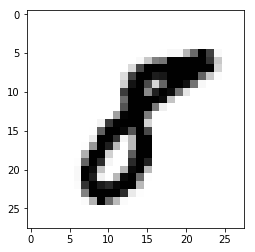

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
#one hot 인코딩 처리 안해도 불러올때 자동으로 onehot 처리 가능
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)
with tf.device('/cpu:0'): 
    nb_classes = 10
    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None, nb_classes])
    #layer1
    W1 = tf.Variable(tf.random_normal([784, 1000]), name = 'weight')
    b1 = tf.Variable(tf.random_normal([1000]), name = 'bias')
    layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)
    #layer2
    W2 = tf.Variable(tf.random_normal([1000, 1000]), name = 'weight')
    b2 = tf.Variable(tf.random_normal([1000]), name = 'bias')
    layer2 = tf.nn.softmax(tf.matmul(layer1, W2) + b2)
    #layer3
    W3 = tf.Variable(tf.random_normal([1000, nb_classes]), name = 'weight')
    b3 = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')
    hypothesis = tf.nn.softmax(tf.matmul(layer2, W3) + b3)

    #cost function
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
    train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print("Epoch : {:04d} cost = {:.9f}".format(epoch+1, avg_cost))
    #accuracy report
    #sess.run없이 돌리는 방법       
    print("Accuracy : ", accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label :", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

# Tensor Board

- deep learning을 할때 복잡한 TF graph를 시각화 할수 있다.
- 값들의 plotting이 가능하다.

### TensorBoard의 다섯 단계

- 1단계 : TensorFlow의 그래프로부터 나타내고 싶은 Tensor들을 정한다.
      w2_hist = tf.summary.histogram("weight2", W2)
      cost_summ = tf.summary.scalar("cost", cost)
- 2단계 : tensor들을 모두 병합한다.
        summary = tf.summary.merge_all()
- 3단계 : session에서 어디다가 기록할 것인지 파일 이름을 정한다.
        writer = tf.summary.FileWriter(' /logs')
- 4단계 : 만들어진 summary를 실행하고, 실제로 파일을 여기서 만든다.
        s, _ = sess.run([summary, optimizer], feed_dict =feed_dict)
        writer.add_summary(s, global_step = global_step
       
- 5단계 : tensorboard를 실행한다.
        tensorboard --logdir=./logs

### Histogram( multi-dimensional tensors)

In [11]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, shape = [4,2])
    Y = tf.placeholder(tf.float32, shape = [4,1])
    W1 = tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
    b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
    b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)


    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

    #각 layer별로 깔끔하게 정리하기 위한것     
    with tf.name_scope("layer1") as scope:
        W1 = tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
        b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

        w1_hist = tf.summary.histogram("weight1", W1)
        b1_hist = tf.summary.histogram("bias1", b1)
        layer1_hist = tf.summary.histogram("layer1", layer1)

    with tf.name_scope("layer2") as scope:
        W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
        b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

        w2_hist = tf.summary.histogram("weight2", W2)
        b2_hist = tf.summary.histogram("bias2", b2)
        hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)
    #summary
    summary = tf.summary.merge_all()
#2, 3단계
sess = tf.Session()
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter("./logs/xor_logs")
writer.add_graph(sess.graph)

s, _ = sess.run([summary, train], feed_dict={X: x_data, Y: y_data})
writer.add_summary(s, global_step=global_step)
global_step += 1
 


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_8' with dtype float and shape [4,2]
	 [[Node: Placeholder_8 = Placeholder[dtype=DT_FLOAT, shape=[4,2], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: layer2/Sigmoid/_41 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_398_layer2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_8', defined at:
  File "C:\Users\POWER USER\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\POWER USER\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-445342b2a344>", line 4, in <module>
    X = tf.placeholder(tf.float32, shape = [4,2])
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1507, in placeholder
    name=name)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_8' with dtype float and shape [4,2]
	 [[Node: Placeholder_8 = Placeholder[dtype=DT_FLOAT, shape=[4,2], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: layer2/Sigmoid/_41 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_398_layer2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.01

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
